In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("fraudTrain.csv")

In [3]:
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df.shape

(1296675, 23)

In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.dropna()

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

In [9]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
df.drop(columns=['first', 'last', 'street' , 'trans_num'], inplace=True)

In [12]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

    unix_time  merch_lat  merch_long  is_fraud  
0  1325376018  36.011293  -82.048315         0  
1  1325376044  49.159047 -118.186462         0  
2  1325376051  43.150704 -112.154481         0  
3  1325376076  47.034331 -112.561071         0  
4  1325376186  38.674999  -78.632459         0

In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [14]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job        dob  \
0  -81.1781      3495          Psychologist, counselling 1988-03-09   
1 -118.2105       149  Special educational needs teacher 1978-06-21   
2 -112.2620      4154        Nature conservation officer 1962-01-19   
3 -112.1138      1939                    Patent attorney 1967-01-12   
4  -79.4629        99     Dance movement psychotherapist 1986-03-28   

    unix_time  merch_lat  merch_long  is_fraud  
0  1325376018  36.011293  -82.048315         0  
1  1325376044  49.159047 -118.186462         0  
2  1325376051  43.150704 -112.154481         0  
3  1325376076  47.034331 -112.561071         0  
4  1325376186  38.674999  -78.632459         0

In [15]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month

df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [16]:
df.head(
)

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  ...  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788  ...   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878  ...   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808  ...   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306  ...   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207  ...   

                                 job        dob   unix_time  merch_lat  \
0          Psychologist, counselling 1988-03-09  1325376018  36.011293   
1  Special educational needs teacher 1978-06-21  1325376044  49.159047   
2        Nature conservation officer 1962-01-19  1325376051  43.150704   
3                    Patent attorney 1967-01-12  1325376076  47.034331   
4     Dance movement psychotherapist 1986-03-28  1325376186  38.674999   

   merch_long  is_fraud  trans_hour  trans_day  trans_month  age  
0  -82.048315         0           0          1            1   30  
1 -118.186462         0           0          1            1   40  
2 -112.154481         0           0          1            1   56  
3 -112.561071         0           0          1            1   52  
4  -78.632459         0           0          1            1   32  

[5 rows x 22 columns]

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['gender']=le.fit_transform(df['gender'])
df['job']=le.fit_transform(df['job'])


In [19]:
df.value_counts('gender')

gender
0    709863
1    586812
Name: count, dtype: int64

In [20]:
df['job']

0          370
1          428
2          307
3          328
4          116
          ... 
1296670    215
1296671    360
1296672    308
1296673    485
1296674    467
Name: job, Length: 1296675, dtype: int64

In [21]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt  gender            city state    zip      lat  ...  \
0       misc_net    4.97       0  Moravian Falls    NC  28654  36.0788  ...   
1    grocery_pos  107.23       0          Orient    WA  99160  48.8878  ...   
2  entertainment  220.11       1      Malad City    ID  83252  42.1808  ...   
3  gas_transport   45.00       1         Boulder    MT  59632  46.2306  ...   
4       misc_pos   41.96       1        Doe Hill    VA  24433  38.4207  ...   

   job        dob   unix_time  merch_lat  merch_long  is_fraud  trans_hour  \
0  370 1988-03-09  1325376018  36.011293  -82.048315         0           0   
1  428 1978-06-21  1325376044  49.159047 -118.186462         0           0   
2  307 1962-01-19  1325376051  43.150704 -112.154481         0           0   
3  328 1967-01-12  1325376076  47.034331 -112.561071         0           0   
4  116 1986-03-28  1325376186  38.674999  -78.632459         0           0   

   trans_day  trans_month  age  
0          1            1   30  
1          1            1   40  
2          1            1   56  
3          1            1   52  
4          1            1   32  

[5 rows x 22 columns]

In [22]:
df.drop(columns=['merch_lat', 'merch_long', 'lat', 'long' ], inplace=True)

In [23]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'unix_time',
       'is_fraud', 'trans_hour', 'trans_day', 'trans_month', 'age'],
      dtype='object')

In [24]:
df.drop(columns=['cc_num', 'trans_date_trans_time','unix_time','dob'], inplace=True)

In [25]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip',
       'city_pop', 'job', 'is_fraud', 'trans_hour', 'trans_day', 'trans_month',
       'age'],
      dtype='object')

In [26]:
df['city']= le.fit_transform(df['city'])
df['state']= le.fit_transform(df['state'])
df['merchant']= le.fit_transform(df['merchant'])
df['category']= le.fit_transform(df['category'])

In [27]:
df.head()

merchant  category     amt  gender  city  state    zip  city_pop  job  \
0       514         8    4.97       0   526     27  28654      3495  370   
1       241         4  107.23       0   612     47  99160       149  428   
2       390         0  220.11       1   468     13  83252      4154  307   
3       360         2   45.00       1    84     26  59632      1939  328   
4       297         9   41.96       1   216     45  24433        99  116   

   is_fraud  trans_hour  trans_day  trans_month  age  
0         0           0          1            1   30  
1         0           0          1            1   40  
2         0           0          1            1   56  
3         0           0          1            1   52  
4         0           0          1            1   32

In [28]:
df.describe()

merchant      category           amt        gender          city  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   3.428585e+02  6.227787e+00  7.035104e+01  4.525513e-01  4.452633e+02   
std    2.009519e+02  3.913443e+00  1.603160e+02  4.977437e-01  2.586001e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.650000e+02  3.000000e+00  9.650000e+00  0.000000e+00  2.240000e+02   
50%    3.460000e+02  6.000000e+00  4.752000e+01  0.000000e+00  4.390000e+02   
75%    5.140000e+02  1.000000e+01  8.314000e+01  1.000000e+00  6.770000e+02   
max    6.920000e+02  1.300000e+01  2.894890e+04  1.000000e+00  8.930000e+02   

              state           zip      city_pop           job      is_fraud  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   2.667728e+01  4.880067e+04  8.882444e+04  2.511734e+02  5.788652e-03   
std    1.433098e+01  2.689322e+04  3.019564e+05  1.401094e+02  7.586269e-02   
min    0.000000e+00  1.257000e+03  2.300000e+01  0.000000e+00  0.000000e+00   
25%    1.500000e+01  2.623700e+04  7.430000e+02  1.310000e+02  0.000000e+00   
50%    2.800000e+01  4.817400e+04  2.456000e+03  2.510000e+02  0.000000e+00   
75%    3.800000e+01  7.204200e+04  2.032800e+04  3.740000e+02  0.000000e+00   
max    5.000000e+01  9.978300e+04  2.906700e+06  4.930000e+02  1.000000e+00   

         trans_hour     trans_day   trans_month           age  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   1.280486e+01  1.558798e+01  6.142150e+00  4.552822e+01  
std    6.817824e+00  8.829121e+00  3.417703e+00  1.740895e+01  
min    0.000000e+00  1.000000e+00  1.000000e+00  1.300000e+01  
25%    7.000000e+00  8.000000e+00  3.000000e+00  3.200000e+01  
50%    1.400000e+01  1.500000e+01  6.000000e+00  4.400000e+01  
75%    1.900000e+01  2.300000e+01  9.000000e+00  5.700000e+01  
max    2.300000e+01  3.100000e+01  1.200000e+01  9.500000e+01

In [29]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

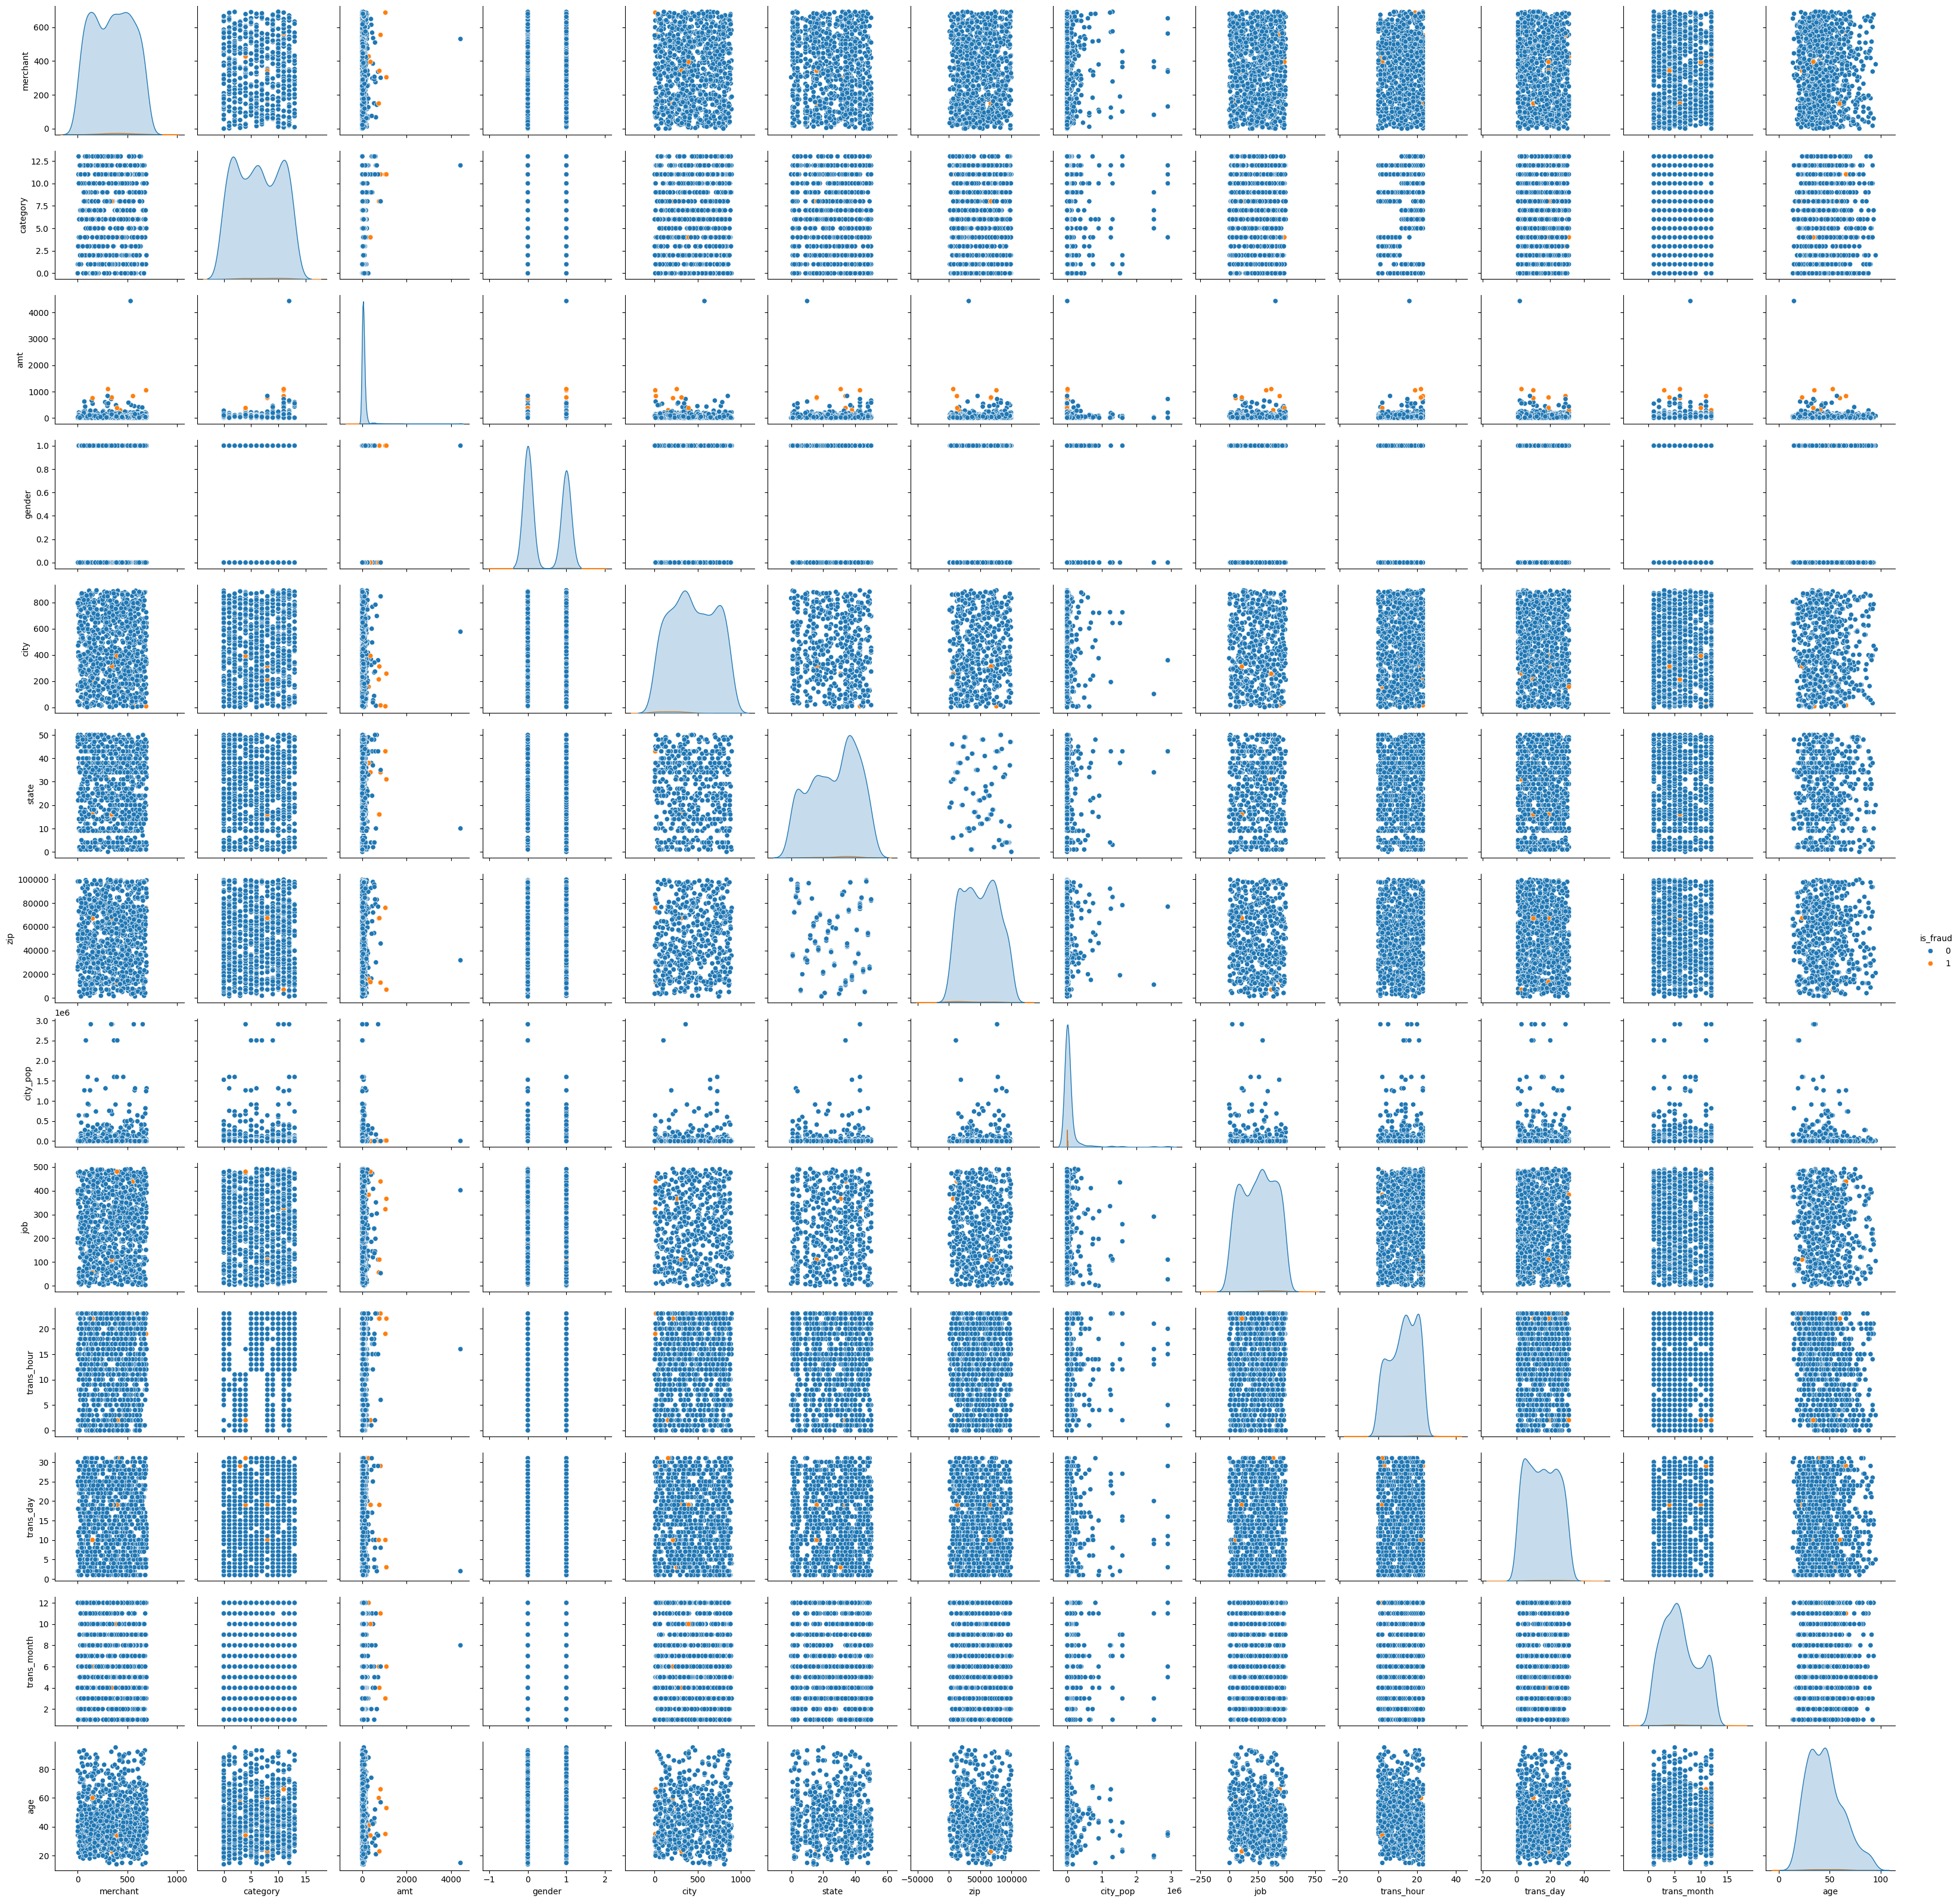

In [30]:
sample_df= df.sample(1000,random_state=42)
sns.pairplot(sample_df, hue='is_fraud')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   merchant     1296675 non-null  int64  
 1   category     1296675 non-null  int64  
 2   amt          1296675 non-null  float64
 3   gender       1296675 non-null  int64  
 4   city         1296675 non-null  int64  
 5   state        1296675 non-null  int64  
 6   zip          1296675 non-null  int64  
 7   city_pop     1296675 non-null  int64  
 8   job          1296675 non-null  int64  
 9   is_fraud     1296675 non-null  int64  
 10  trans_hour   1296675 non-null  int32  
 11  trans_day    1296675 non-null  int32  
 12  trans_month  1296675 non-null  int32  
 13  age          1296675 non-null  int64  
dtypes: float64(1), int32(3), int64(10)
memory usage: 123.7 MB


In [32]:
df= df.astype(int)

In [33]:
X= df.drop(columns=['is_fraud'])
y= df['is_fraud']

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42, stratify=y)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
    )

In [38]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [39]:
y_pre_lr= lr.predict(X_test)
y_pre_lr

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
lr_accuracy_score = accuracy_score(y_test, y_pre_lr)
lr_accuracy_score

0.9402703067461006

In [42]:
lr_confusion_matrix= confusion_matrix(y_test, y_pre_lr)
lr_confusion_matrix

array([[242708,  15126],
       [   364,   1137]])

In [43]:
lr_classification=print(classification_report(y_test, y_pre_lr))
lr_classification

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    257834
           1       0.07      0.76      0.13      1501

    accuracy                           0.94    259335
   macro avg       0.53      0.85      0.55    259335
weighted avg       0.99      0.94      0.96    259335



In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[-0.85066645,  0.45301727, -0.40652396, ...,  1.51861524,
        -0.62717617,  1.11806027],
       [ 1.40324163, -1.07955349, -0.01176405, ..., -0.74660938,
        -0.62717617,  0.08432096],
       [-0.9352502 , -0.05783965,  0.33205911, ...,  1.29209278,
        -0.91987675,  0.54376065],
       ...,
       [ 0.845984  ,  0.70844573, -0.20277691, ..., -1.65269923,
         1.42172784, -0.43254869],
       [-0.87554403, -1.59041041,  0.12831205, ...,  1.17883155,
        -0.3344756 , -1.35142807],
       [-0.45760081, -0.05783965, -0.17094143, ...,  0.61252539,
         1.12902727, -1.29399811]])

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [47]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [48]:
y_pre_dt= dt.predict(X_test)
y_pre_dt

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import accuracy_score
dt_accuracy_score = accuracy_score(y_test, y_pre_dt)
dt_accuracy_score

0.9980604237761969

In [50]:
dt_confusion_matrix= confusion_matrix(y_test, y_pre_dt)
dt_confusion_matrix

array([[257597,    237],
       [   266,   1235]])

In [51]:
dt_classification=print(classification_report(y_test, y_pre_dt))
dt_classification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.84      0.82      0.83      1501

    accuracy                           1.00    259335
   macro avg       0.92      0.91      0.91    259335
weighted avg       1.00      1.00      1.00    259335



In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf= RandomForestClassifier(class_weight='balanced',random_state=4)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=4)

In [55]:
y_pre_rf= rf.predict(X_test)
y_pre_rf

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
rf_accuracy_score = accuracy_score(y_test, y_pre_dt)
rf_accuracy_score

0.9980604237761969

In [57]:
rf_confusion_matrix= confusion_matrix(y_test, y_pre_rf)
rf_confusion_matrix

array([[257809,     25],
       [   365,   1136]])

In [58]:
rf_classification=print(classification_report(y_test, y_pre_rf))
rf_classification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.76      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335

